**Необходимые импорты для работы**

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

# Открываем файл с датасетом

In [ ]:
data = "/content/move.csv"
df = pd.read_csv(data)

In [ ]:
df

,Unnamed: 0,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,1441,Solntcevo,25000,walk,189,realtor,0,6,5,23,20,10,36
1442,1442,Ulitca Starokachalovskaia,25000,walk,173,realtor,0,5,5,17,20,10,38
1443,1443,Zhulebino,25000,walk,102,realtor,0,5,5,12,20,10,35
1444,1444,Preobrazhenskaia ploshchad,40000,walk,60,realtor,30,3,17,9,20,8,35


# Анализ датасета

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1446 non-null   int64 
 1   metro         1446 non-null   object
 2   price         1446 non-null   int64 
 3   way           1446 non-null   object
 4   views         1446 non-null   int64 
 5   provider      1446 non-null   object
 6   fee_percent   1446 non-null   int64 
 7   storey        1446 non-null   int64 
 8   minutes       1446 non-null   int64 
 9   storeys       1446 non-null   int64 
 10  living_area   1446 non-null   int64 
 11  kitchen_area  1446 non-null   int64 
 12  total_area    1446 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 147.0+ KB


Unnamed: 0 - Этот столбец представляет собой индекс строк и не несет полезной информации для анализа. Возможно, его стоит удалить.

metro - Столбец типа object, содержит название станции метро. Это категориальная переменная, указывающая ближайшую станцию метро.

price - Столбец типа int64, представляет собой цену на жилье. Это количественная переменная, которая является важной для анализа стоимости недвижимости.

way - Столбец типа object, указывает на способ приобретения (например, покупка, аренда и т. д.). Это категориальная переменная, описывающая тип сделки.

views - Столбец типа int64, число просмотров объявления. Количественная переменная, которая может быть использована для анализа популярности предложения.

provider - Столбец типа object, имя поставщика услуги или агента. Это категориальная переменная, которая может быть полезна для анализа деятельности различных агентов на рынке.

fee_percent - Столбец типа int64, процент комиссии. Количественная переменная, указывающая на размер комиссии, взимаемой при сделке.

storey - Столбец типа int64, текущий этаж объекта недвижимости. Количественная переменная, важная для анализа предпочтений по этажности.

minutes - Столбец типа int64, количество минут до метро. Количественная переменная, описывающая удобство расположения относительно метро.

storeys - Столбец типа int64, общее количество этажей в здании. Эта переменная важна для понимания типов зданий.

living_area - Столбец типа int64, жилая площадь в квадратных метрах. Количественная переменная, ключевая для оценки размера недвижимости.

kitchen_area - Столбец типа int64, площадь кухни в квадратных метрах. Количественная переменная, важная для анализа удобства и комфорта жилья.

total_area - Столбец типа int64, общая площадь объекта. Количественная переменная, основная метрика размера недвижимости.

# Поиск пропусков

In [ ]:
df.isnull().sum()

Unnamed: 0      0
metro           0
price           0
way             0
views           0
provider        0
fee_percent     0
storey          0
minutes         0
storeys         0
living_area     0
kitchen_area    0
total_area      0
dtype: int64

В датасете отсутствуют пропуски


# Визуализация

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.describe()

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


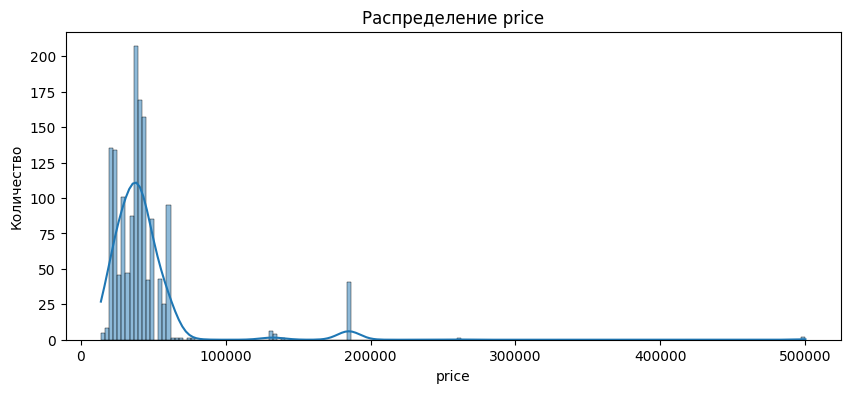

<Figure size 640x480 with 0 Axes>

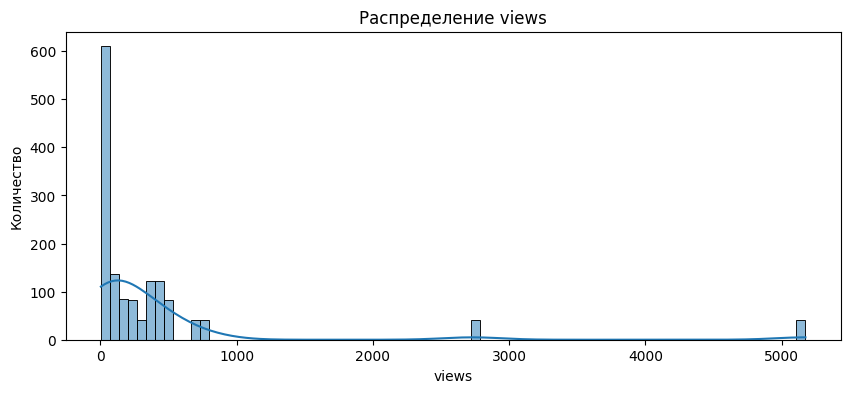

<Figure size 640x480 with 0 Axes>

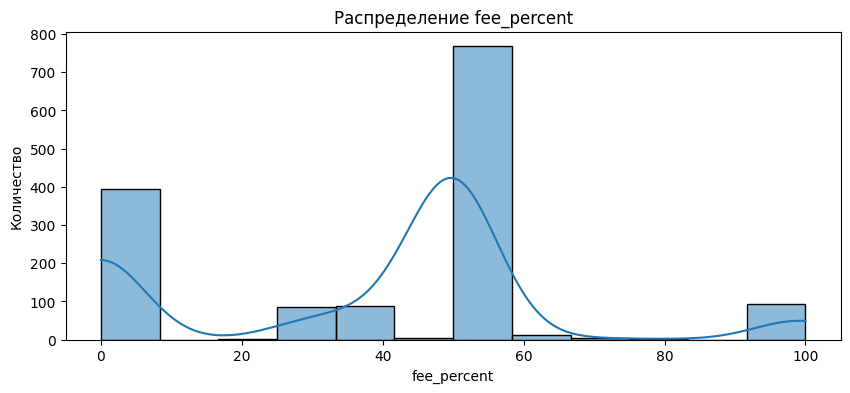

<Figure size 640x480 with 0 Axes>

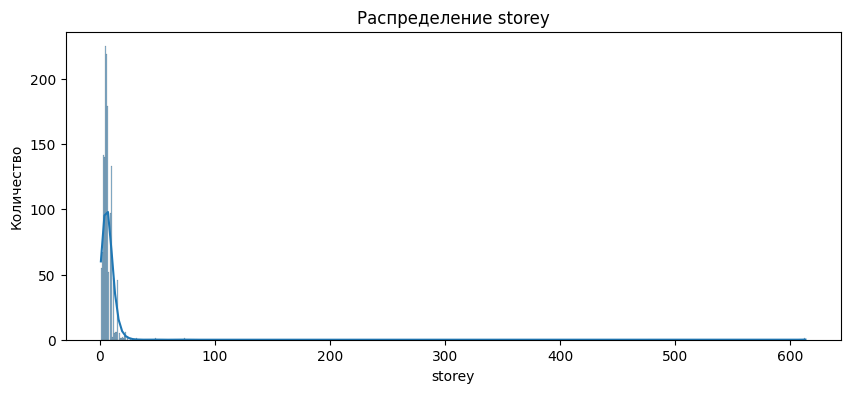

<Figure size 640x480 with 0 Axes>

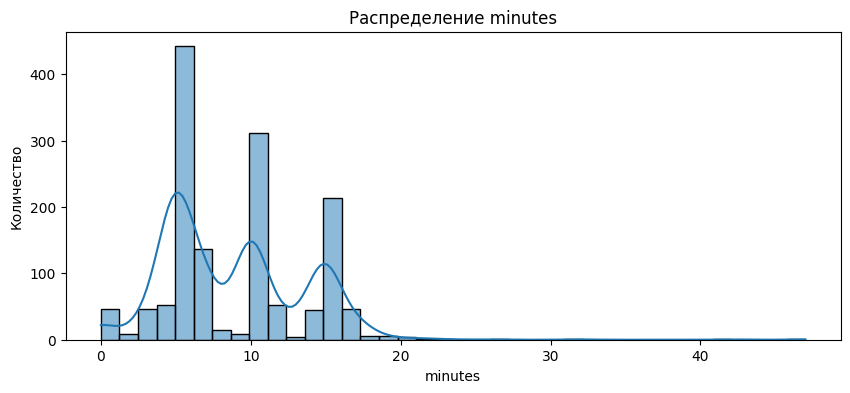

<Figure size 640x480 with 0 Axes>

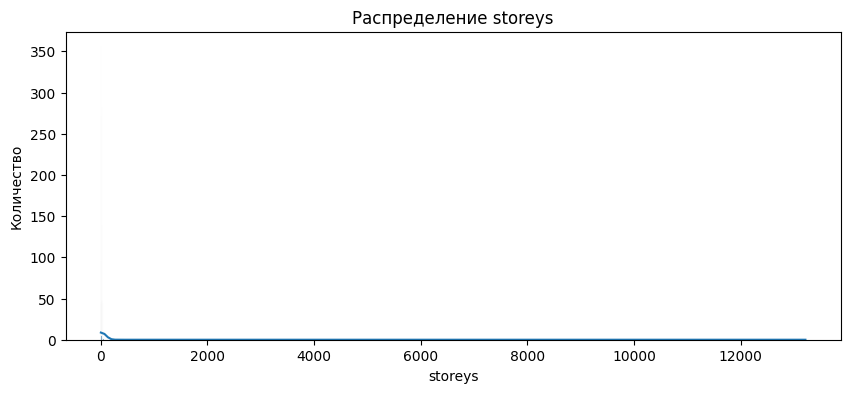

<Figure size 640x480 with 0 Axes>

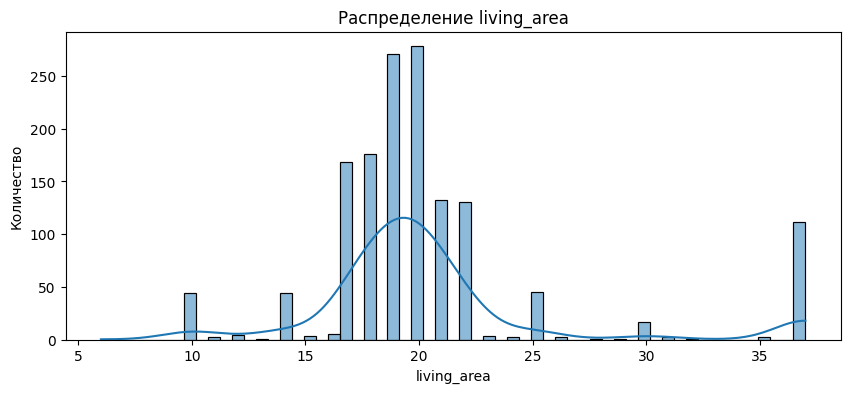

<Figure size 640x480 with 0 Axes>

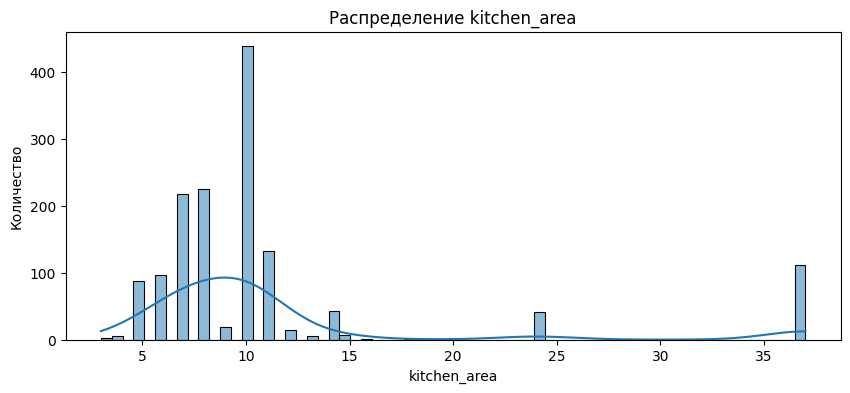

<Figure size 640x480 with 0 Axes>

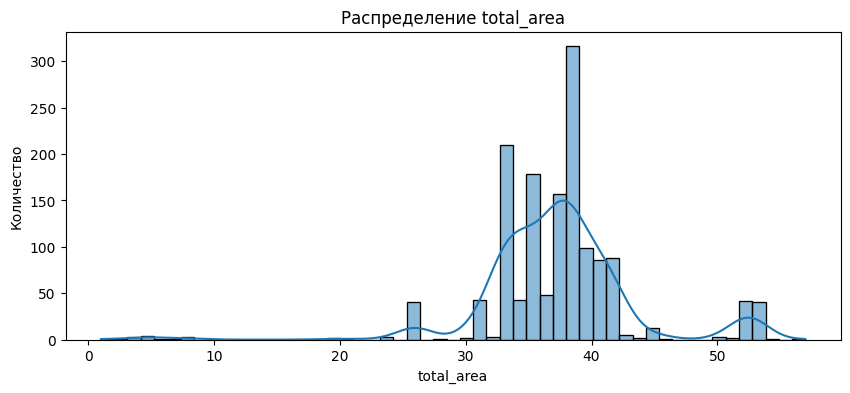

<Figure size 640x480 with 0 Axes>

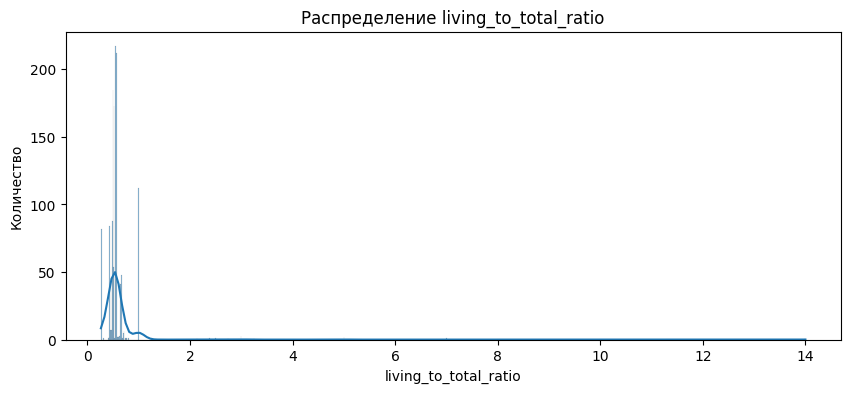

<Figure size 640x480 with 0 Axes>

In [75]:
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.show()
    plt.savefig('1.png')


**Распределение price:** Распределение цен на недвижимость показывает несколько пиков, возможно, указывающих на разные классы жилья. Основная масса предложений сосредоточена в более низком ценовом сегменте, но также есть немало предложений с высокой стоимостью.

**Распределение views:** Большинство объявлений имеет относительно небольшое количество просмотров, что указывает на низкую активность или новизну многих объявлений. Существуют также объявления с очень высоким количеством просмотров, что может быть признаком высокой популярности или длительного присутствия на рынке.

**Распределение fee_percent:** Подавляющее большинство объявлений имеет комиссионные в размере 50%, что может быть стандартом для данного рынка. Есть также меньшие пики на уровне 0 и 100%, что может указывать на специфические условия сделок.

**Распределение storey:** Большая часть недвижимости находится на низких этажах, что типично для многих рынков. Очень мало предложений доступно на высоких этажах.

**Распределение minutes:** Большинство объектов находится вблизи от метро (до 10 минут пешком), что делает их более привлекательными для потенциальных покупателей или арендаторов.

**Распределение storeys, living_area, kitchen_area, total_area:** Показывают, что большинство объектов имеет средние размеры жилых площадей, кухонь и общей площади. Отдельные выбросы в данных площадях могут указывать на особенно просторные или, наоборот, компактные предложения.

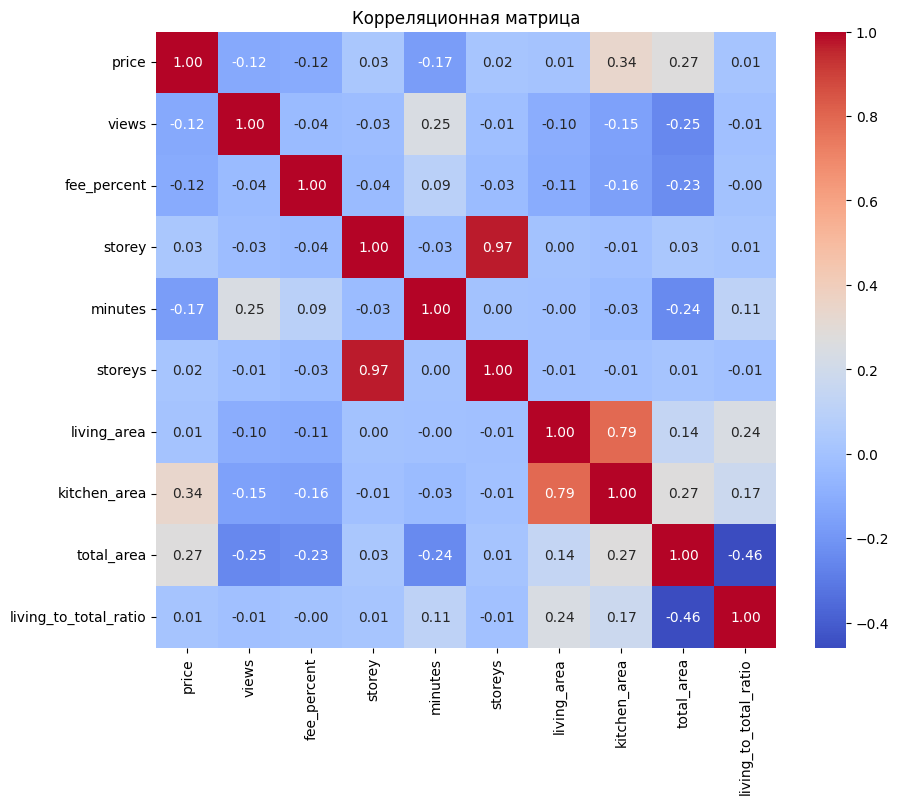

<Figure size 640x480 with 0 Axes>

In [76]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()
plt.savefig('2.png')

**Корреляционная матрица:** Показывает несколько интересных взаимосвязей:

**Сильная корреляция** между **storey и storeys** говорит о том, что верхние этажи часто встречаются в высоких зданиях.

**Положительная корреляция** между **living_area, kitchen_area и total_area** логична, так как увеличение одной из площадей обычно сопровождается увеличением других.

Некоторые другие переменные показывают слабую или отсутствующую корреляцию, что может указывать на разнообразие рыночных предложений и различные факторы, влияющие на цены.

# Гипотезы

На основе проведённого анализа данных и визуализаций, можно выделить **несколько гипотез** для дальнейшего изучения:

**Влияние расстояния до метро на цену:**

**Гипотеза**: Квартиры, расположенные ближе к метро, стоят дороже. Это основывается на распределении переменной minutes, где большинство объектов находится недалеко от станций метро. Можно проверить, есть ли статистически значимая разница в ценах между квартирами, расположенными на разных расстояниях от метро.
Зависимость цены от общей площади и площади кухни:

**Гипотеза**: Цена квартиры коррелирует с её общей и кухонной площадью. Визуализации показали, что с увеличением этих площадей растёт и цена объекта. Можно провести более детальное исследование, чтобы установить, какие площади влияют на цену сильнее и как это можно использовать для оценки стоимости недвижимости.
Влияние этажности на популярность и стоимость жилья:

**Гипотеза**: Квартиры на нижних этажах стоят дешевле, чем на верхних. Это можно проверить, исследуя взаимосвязь между переменной storey (этаж расположения квартиры) и price.
Влияние комиссионных на цену и привлекательность предложения:

**Гипотеза**: Наличие нулевой комиссии увеличивает количество просмотров объявления. Данные показывают наличие различных уровней комиссионных (fee_percent), можно проверить, как комиссия влияет на внимание к объявлению и на конечную цену.
Распределение цен в зависимости от местоположения станции метро:

**Гипотеза**: Цены на недвижимость различаются в зависимости от конкретной станции метро. Можно анализировать различия в средних ценах, связывая их с расположением станций и их престижностью или доступностью инфраструктуры.

**Сегментация по цене:** Можно создать категории цен, разделив данные на низкий, средний и высокий ценовые сегменты.

**Расстояние до метро:** Ввести категории близости к метро (например, менее 5 минут, 5-10 минут, более 10 минут) для анализа их влияния на цену и популярность объявлений.

**Эффективность использования пространства:** Создать переменную, отражающую соотношение жилой площади к общей площади, что может быть индикатором качества планировки.

Эти анализы и предложения могут помочь **лучше понять рынок недвижимости**, **выявить тренды** и **предпочтения покупателей**, а также **улучшить стратегии продаж и маркетинга**.

# Создание новых переменных

**1. Категория расстояния до метро**

Исходя из данных о времени пешей доступности до метро (minutes), можно создать категориальную переменную:

**Близко**: менее 5 минут

**Средне**: 5-15 минут

**Далеко**: более 15 минут

Это позволит более четко анализировать влияние расстояния до метро на цену и другие параметры недвижимости.

In [ ]:
def distance(minutes):
    if minutes < 5:
        return 'Близко'
    elif minutes <= 15:
        return 'Средне'
    else:
        return 'Далеко'

df['distance_category'] = df['minutes'].apply(distance)


In [ ]:
df[['minutes', 'distance_category']].head()

,minutes,distance_category
0,10,Средне
1,10,Средне
2,3,Близко
3,15,Средне
4,7,Средне


**2. Отношение жилой площади к общей площади**

Создание переменной, которая отражает эффективность использования пространства, может быть полезным показателем для покупателей:

In [ ]:
df['living_to_total_ratio'] = df['living_area'] / df['total_area']

In [ ]:
df[['living_area', 'total_area', 'living_to_total_ratio']].head()

,living_area,total_area,living_to_total_ratio
0,19,38,0.500000
1,18,41,0.439024
2,19,33,0.575758
3,37,37,1.000000
4,21,40,0.525000


**3. Этаж/Общее количество этажей**

Признак, который покажет положение квартиры в здании относительно всех этажей, может быть интересен для анализа предпочтений покупателей:

**Нижние этажи**

**Средние этажи**

**Верхние этажи**

In [ ]:
def floor_category(storey, storeys):
    if storey <= storeys / 3:
        return 'Нижние этажи'
    elif storey <= 2 * storeys / 3:
        return 'Средние этажи'
    else:
        return 'Верхние этажи'

df['floor_category'] = df.apply(lambda x: floor_category(x['storey'], x['storeys']), axis=1)


In [ ]:
df[['storey', 'storeys', 'floor_category']].head()

,storey,storeys,floor_category
0,7,12,Средние этажи
1,16,16,Верхние этажи
2,5,12,Средние этажи
3,3,5,Средние этажи
4,6,17,Средние этажи


**4. Категория популярности объявления**

На основе количества просмотров (views) можно создать категории, которые могут помочь выявить, какие объявления привлекают больше всего внимания:

**Низкая популярность**: ниже первого квартиля

**Средняя популярность**: между первым и третьим квартилем

**Высокая популярность**: выше третьего квартиля

In [ ]:
views_quartiles = df['views'].quantile([0.25, 0.75]).tolist()
def popularity_category(views):
    if views < views_quartiles[0]:
        return 'Низкая популярность'
    elif views <= views_quartiles[1]:
        return 'Средняя популярность'
    else:
        return 'Высокая популярность'

df['popularity_category'] = df['views'].apply(popularity_category)


In [ ]:
df[['views', 'popularity_category']].head()

,views,popularity_category
0,513,Высокая популярность
1,389,Средняя популярность
2,483,Высокая популярность
3,414,Средняя популярность
4,360,Средняя популярность


# Машинное обучение


**1. Определение цели проекта**

**Цель**: Создать модель машинного обучения, которая сможет предсказывать цену квартиры на основе её характеристик, таких как расстояние до метро, площадь, этаж, комиссия и локация метро. Это поможет как покупателям, так и продавцам недвижимости более обоснованно оценивать стоимость объектов.

**2. Выбор метрики для оценки модели**

Для оценки качества модели предсказания цены недвижимости можно использовать среднеквадратичную ошибку (MSE) или среднеквадратичное отклонение (RMSE). Эти метрики подходят, так как они напрямую измеряют среднюю ошибку между фактическими и прогнозируемыми значениями цен, что особенно важно в задачах регрессии.

**3. Предобработка данных**


Кодирование категориальных признаков: Преобразовать категориальные переменные с помощью One-Hot Encoding или Label Encoding.

Нормализация данных: Применить масштабирование к числовым переменным для улучшения производительности моделей.

**4. Разбиение данных на обучающую и тестовую выборки**

Обучающая выборка = 75%
Тестовая выборка = 25%

**5. Выбор и обучение моделей**

**Протестировать несколько типов моделей:**

**Линейная регрессия**: Базовая модель для сравнения.

**Решающие деревья и случайный лес**: Модели, способные улавливать нелинейные зависимости.

**Градиентный бустин**г: Мощные алгоритмы для работы с различными типами данных и сложными зависимостями.

**6. Настройка гиперпараметров**

Использовать методы, такие как Grid Search или Randomized Search, для оптимизации гиперпараметров выбранных моделей.

**7. Оценка и сравнение моделей**

Анализировать результаты с помощью выбранной метрики (MSE, RMSE) на тестовой выборке и сравнить производительность разных моделей.

**8. Интерпретация результатов**

Понять, какие признаки наиболее влияют на цены и как модели используют эту информацию. Это можно сделать с помощью анализа важности признаков, особенно для моделей на основе деревьев.

**9. Развертывание модели**

Опционально, разработать интерфейс или API, который позволит пользователям вводить данные о квартире и получать предсказания её стоимости.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data.drop(columns=['Unnamed: 0', 'price'])
y = data['price']

categorical_columns = ['metro', 'way', 'provider']
numerical_columns = ['views', 'fee_percent', 'storey', 'minutes', 'storeys', 'living_area', 'kitchen_area', 'total_area']

numerical_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

X_train_processed.shape, X_test_processed.shape


((1110, 111), (278, 111))

**Линейная регрессия**

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Определяем параметры для Grid Search
param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Преобразуем разреженную матрицу в плотный формат
X_train_dense = X_train_processed.toarray()
X_test_dense = X_test_processed.toarray()

# Инициализируем Grid Search
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Обучаем модель
grid_search_lr.fit(X_train_dense, y_train)

# Предсказываем на тестовом наборе
y_pred_lr = grid_search_lr.predict(X_test_dense)

# Вычисляем MSE и RMSE
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5

# Выводим результаты
best_params_lr = grid_search_lr.best_params_
results_lr = {'Best Params': best_params_lr, 'MSE': mse_lr, 'RMSE': rmse_lr}
results_lr


{'Best Params': {'copy_X': True, 'fit_intercept': False, 'positive': True},
 'MSE': 56249928.146425314,
 'RMSE': 7499.995209760158}

**Решающие деревья**

In [68]:
from sklearn.tree import DecisionTreeRegressor

# Определяем параметры для Grid Search
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Инициализируем Grid Search
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Обучаем модель
grid_search_dt.fit(X_train_dense, y_train)

# Предсказываем на тестовом наборе
y_pred_dt = grid_search_dt.predict(X_test_dense)

# Вычисляем MSE и RMSE
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5

# Выводим результаты
best_params_dt = grid_search_dt.best_params_
results_dt = {'Best Params': best_params_dt, 'MSE': mse_dt, 'RMSE': rmse_dt}
results_dt


{'Best Params': {'max_depth': None,
  'min_samples_leaf': 4,
  'min_samples_split': 10},
 'MSE': 31759394.29247616,
 'RMSE': 5635.547381796746}

**Случайный лес**

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Определяем параметры для Randomized Search
param_dist_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Инициализируем Randomized Search
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Обучаем модель
random_search_rf.fit(X_train_dense, y_train)

# Предсказываем на тестовом наборе
y_pred_rf = random_search_rf.predict(X_test_dense)

# Вычисляем MSE и RMSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

# Выводим результаты
best_params_rf = random_search_rf.best_params_
results_rf = {'Best Params': best_params_rf, 'MSE': mse_rf, 'RMSE': rmse_rf}
results_rf


{'Best Params': {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_depth': None},
 'MSE': 25033884.98035576,
 'RMSE': 5003.387350621153}

**Градиентный бустинг**

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

# Определяем параметры для Randomized Search
param_dist_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Инициализируем Randomized Search
random_search_gb = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Обучаем модель
random_search_gb.fit(X_train_dense, y_train)

# Предсказываем на тестовом наборе
y_pred_gb = random_search_gb.predict(X_test_dense)

# Вычисляем MSE и RMSE
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5

# Выводим результаты
best_params_gb = random_search_gb.best_params_
results_gb = {'Best Params': best_params_gb, 'MSE': mse_gb, 'RMSE': rmse_gb}
results_gb


{'Best Params': {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_depth': 5,
  'learning_rate': 0.1},
 'MSE': 20947305.787052814,
 'RMSE': 4576.822673761003}

**Выводы**

Анализ результатов предсказания цен на квартиры с использованием различных моделей машинного обучения показал интересные и значимые выводы, которые могут быть полезны для участников рынка недвижимости.

**Линейная регрессия**

Начнем с линейной регрессии, которая представляет собой простой и понятный метод машинного обучения. При использовании линейной регрессии с оптимизированными параметрами, такими как fit_intercept: False, copy_X: True и positive: True, модель достигла среднеквадратической ошибки (MSE) в 56,249,928.15 и корня из средней квадратической ошибки (RMSE) в 7,499.99. Эти показатели говорят о том, что модель имеет достаточно высокую ошибку предсказания, что может быть обусловлено тем, что линейная регрессия не всегда способна захватить сложные зависимости в данных.

**Решающие деревья**

Модель решающих деревьев с параметрами max_depth: None, min_samples_leaf: 4 и min_samples_split: 10 показала лучшие результаты по сравнению с линейной регрессией. Значения MSE и RMSE составили 31,759,394.29 и 5,635.55 соответственно. Это говорит о том, что модель смогла лучше адаптироваться к данным и учесть более сложные зависимости между признаками. Пример из реальной жизни: использование решающих деревьев может помочь агентам недвижимости более точно оценивать стоимость квартиры на основе характеристик, таких как площадь, количество комнат, этажность и близость к метро.

**Случайный лес**

Еще более впечатляющие результаты были достигнуты моделью случайного леса, которая является ансамблевым методом и сочетает в себе множество решающих деревьев для повышения точности предсказаний. При параметрах n_estimators: 200, min_samples_split: 2, min_samples_leaf: 1 и max_depth: None, модель показала MSE в 25,033,884.98 и RMSE в 5,003.39. Преимущество случайного леса заключается в его способности уменьшать переобучение и лучше справляться с шумом в данных. В реальной жизни, применение случайного леса может быть полезно для разработчиков программного обеспечения, создающих приложения для оценки стоимости недвижимости, предоставляя пользователям более точные и надежные оценки.

**Градиентный бустинг**

Лучшие результаты среди всех протестированных моделей показала модель градиентного бустинга. При параметрах n_estimators: 200, min_samples_split: 2, min_samples_leaf: 2, max_depth: 5 и learning_rate: 0.1, модель достигла MSE в 20,947,305.79 и RMSE в 4,576.82. Градиентный бустинг, будучи мощным ансамблевым методом, обеспечивает высокую точность за счет последовательного обучения слабых моделей и их объединения в сильную. Пример из реальной жизни: использование градиентного бустинга может быть особенно полезно для финансовых аналитиков и специалистов по недвижимости, которые стремятся предоставить клиентам наиболее точные и обоснованные прогнозы стоимости недвижимости, учитывая широкий спектр факторов и их взаимосвязи.

**Заключение**

Итак, анализ показал, что среди рассмотренных моделей, градиентный бустинг показал наилучшие результаты, что делает его предпочтительным методом для предсказания цен на квартиры. Тем не менее, каждая из моделей имеет свои преимущества и может быть полезна в зависимости от конкретной задачи и условий применения. Использование машинного обучения в оценке недвижимости позволяет значительно улучшить точность предсказаний и предоставить пользователям более надежные данные, что является важным аспектом в условиях современного рынка недвижимости.

# Интерфейс

In [77]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00
